# Atlanta Crime - Unsupervised Learning

## Description

In this part of the project, we will use unsupervised learning algorithms, namely, DBSCAN, K-Means, and Mean Shift clustering algorithms to analyze the Atlanta Crime dataset. Clustering based on both location and time will provide us more insights about the dataset that will be useful in understanding the data prior to building our predictive models with supervised learning algorithms

[DBSCAN Method 2](#method2)

## Import Libraries

In [1]:
import sklearn as sk
from sklearn import cluster
from sklearn import neighbors
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Packages for geospatial analysis
# Link: https://geoffboeing.com/2014/08/clustering-to-reduce-spatial-data-set-size/
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

## Load Data

In [2]:
# 2019
data = pd.read_csv("COBRA-2019.csv", sep=',', header=0, engine='python', usecols = lambda column : column in ["Latitude", "Longitude"])
# Cleaned 2009-2018
#data = pd.read_csv("cobra-clean.csv", sep=',', header=0, engine='python', usecols = lambda column : column in ["Latitude", "Longitude"])
X = data.to_numpy()
head_tail = data.iloc[np.r_[0:10, -10:0]]
head_tail

,Latitude,Longitude
0,33.75194,-84.38964
1,33.75312,-84.39208
2,33.68077,-84.49370
3,33.75126,-84.37207
4,33.70204,-84.44972
5,33.75082,-84.39615
6,33.69612,-84.50370
7,33.81022,-84.41347
8,33.82010,-84.36481
9,33.76909,-84.38208


In [3]:
# Geo spatial
df = pd.read_csv('COBRA-2019.csv')
coords = df.as_matrix(columns=['Latitude', 'Longitude'])

C:\Users\Gabe\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


## Plot DBSCAN Function

In [3]:
def plot_dbscan(labels):
    #colors = ['y', 'b', 'g', 'r']
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors): 
        if k == -1: 
            # Black used for noise. 
            col = 'k'
        class_member_mask = (labels == k) 

        xy = X[class_member_mask & core_samples_mask] 
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                          markeredgecolor='k',  
                                          markersize=6) 

        xy = X[class_member_mask & ~core_samples_mask] 
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                          markeredgecolor='k', 
                                          markersize=6) 
  
    plt.title('number of clusters: %d' %n_clusters) 
    plt.ylim(bottom = -84.6, top = -84.25)
    plt.xlim(left = 33.62, right = 33.9)
    plt.show() 

## K-Distance Plot (Elbow Method)

k-distance plot for k= 3
nbrs NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                 radius=1.0)
--------------------------------------------------------------


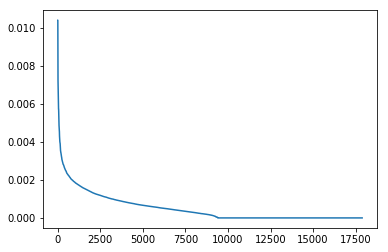

--------------------------------------------------------------
k-distance plot for k= 5
nbrs NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)
--------------------------------------------------------------


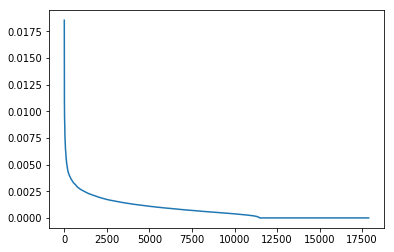

--------------------------------------------------------------
k-distance plot for k= 10
nbrs NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)
--------------------------------------------------------------


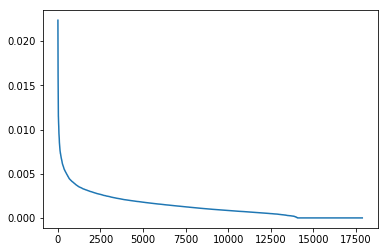

--------------------------------------------------------------
k-distance plot for k= 15
nbrs NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                 radius=1.0)
--------------------------------------------------------------


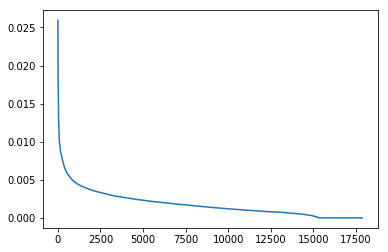

--------------------------------------------------------------
k-distance plot for k= 25
nbrs NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                 radius=1.0)
--------------------------------------------------------------


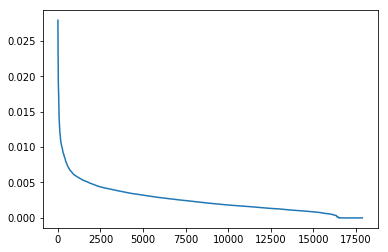

--------------------------------------------------------------
k-distance plot for k= 50
nbrs NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                 radius=1.0)
--------------------------------------------------------------


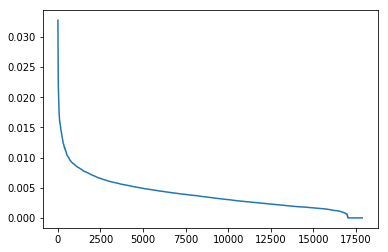

--------------------------------------------------------------
k-distance plot for k= 100
nbrs NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                 radius=1.0)
--------------------------------------------------------------


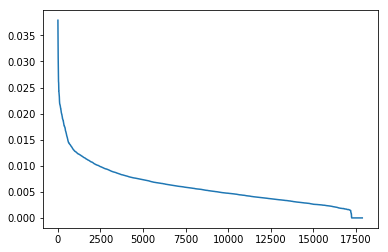

--------------------------------------------------------------


In [4]:
min_samples_array = np.array([3,5,10,15,25,50,100])
#min_samples_array = np.array([2,3,4,5,15,30,75])
for k in min_samples_array:
    nbrs = neighbors.NearestNeighbors(k).fit(X)
    distances, indices = nbrs.kneighbors(X)
    k_distances = distances[:,-1]
    k_distances = -np.sort((-k_distances))
    points = np.arange(distances.shape[0])
    
    print('k-distance plot for k=',k)
    print('nbrs', nbrs)
    
    print('--------------------------------------------------------------')
    plt.plot(points,k_distances)
    plt.show()
    print('--------------------------------------------------------------')

## Compute DBSCAN

DBSCAN for Eps = 0.002 and min_samples = [3.0]
--------------------------------------------------------------
Number of Clusters:  307
Number of Noise Points:  608
Labels:  [ 0  0  1 ...  0  0 45]


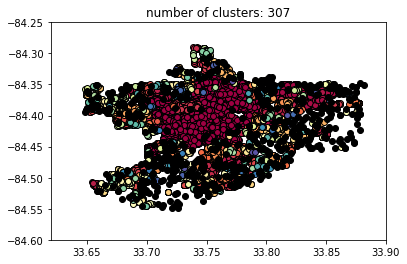

--------------------------------------------------------------
DBSCAN for Eps = 0.0025 and min_samples = [5.0]
--------------------------------------------------------------
Number of Clusters:  99
Number of Noise Points:  688
Labels:  [0 0 1 ... 0 0 0]


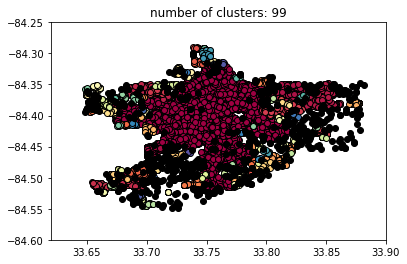

--------------------------------------------------------------
DBSCAN for Eps = 0.004 and min_samples = [10.0]
--------------------------------------------------------------
Number of Clusters:  23
Number of Noise Points:  421
Labels:  [0 0 1 ... 0 0 0]


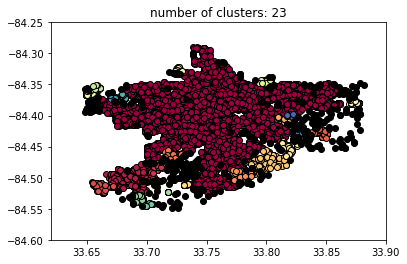

--------------------------------------------------------------
DBSCAN for Eps = 0.005 and min_samples = [15.0]
--------------------------------------------------------------
Number of Clusters:  8
Number of Noise Points:  375
Labels:  [0 0 1 ... 0 0 0]


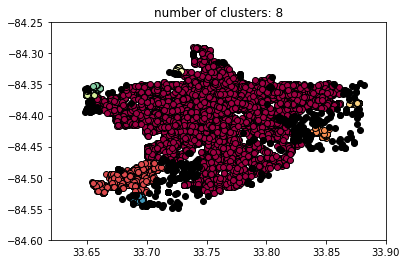

--------------------------------------------------------------
DBSCAN for Eps = 0.006 and min_samples = [20.0]
--------------------------------------------------------------
Number of Clusters:  6
Number of Noise Points:  293
Labels:  [0 0 1 ... 0 0 0]


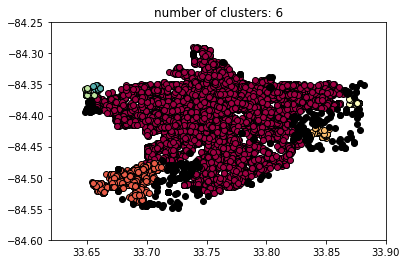

--------------------------------------------------------------
DBSCAN for Eps = 0.007 and min_samples = [50.0]
--------------------------------------------------------------
Number of Clusters:  10
Number of Noise Points:  619
Labels:  [0 0 1 ... 0 0 0]


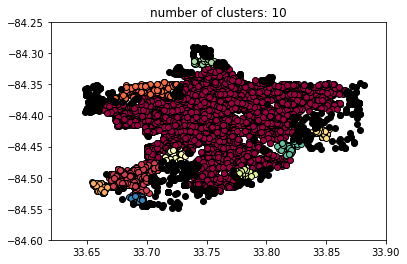

--------------------------------------------------------------
DBSCAN for Eps = 0.01 and min_samples = [100.0]
--------------------------------------------------------------
Number of Clusters:  3
Number of Noise Points:  715
Labels:  [0 0 0 ... 0 0 0]


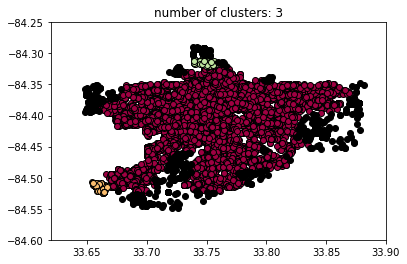

--------------------------------------------------------------


In [5]:
#Parameters are in form of tuples where the first value is eps
#and the second value is min_samples i.e: (eps,min_samples)
#params_array = np.array([(0.002,3),(0.0025,5),(0.004,10),(0.005,15),(0.006,20),(0.007,50),(0.010,100)])
params_array = np.array([(0.002,3),(0.0025,5),(0.004,10),(0.005,15),(0.006,20),(0.007,50),(0.010,100)])
for params in params_array:
    db = sk.cluster.DBSCAN(params[0], params[1]).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    print('DBSCAN for Eps =',params[0],'and min_samples =',[params[1]])
    print('--------------------------------------------------------------')
    print('Number of Clusters: ',n_clusters)
    print('Number of Noise Points: ',n_noise)
    print('Labels: ',labels)
    #print('Unique Labels: ',np.unique(labels))
    plot_dbscan(labels)
    print('--------------------------------------------------------------')

## DBSCAN Method 2 (spatial representation)
<a id='method2'></a>

In [18]:
# DBSCAN algo with radians

kms_per_radian = 6371.0088
epsilon = 0.5 / kms_per_radian
db = sk.cluster.DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 49


In [19]:
## Finding center-most point of clusters

def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)
centermost_points = clusters.map(get_centermost_point)

In [20]:
lats, lons = zip(*centermost_points)
rep_points = pd.DataFrame({'Longitude':lons, 'Latitude':lats})

In [21]:
#rs = rep_points.apply(lambda row: df[(df['Latitude']==row['Latitude']) &amp;&amp; (df['Longitude']==row['Longitude'])].iloc[0], axis=1)
rs = rep_points.apply(lambda row: df[(df['Latitude']==row['Latitude']) & (df['Longitude']==row['Longitude'])].iloc[0], axis=1)

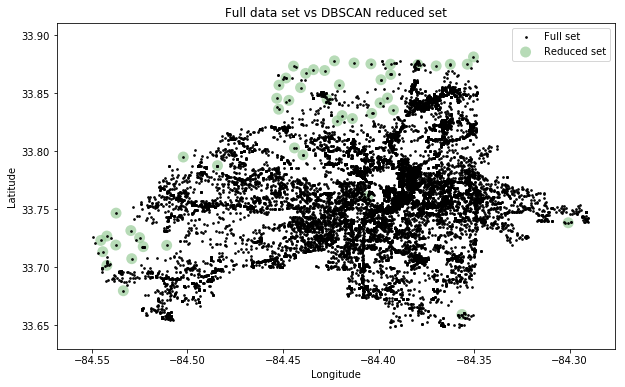

In [22]:
fig, ax = plt.subplots(figsize=[10, 6])
rs_scatter = ax.scatter(rs['Longitude'], rs['Latitude'], c='#99cc99', edgecolor='None', alpha=0.7, s=120)
df_scatter = ax.scatter(df['Longitude'], df['Latitude'], c='k', alpha=0.9, s=3)
ax.set_title('Full data set vs DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.show()